In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Wiki Outline of Monte Carlo Method
    #Define a domain of possible inputs
    #Generate inputs randomly from a probability distribution over the domain
    #Perform a deterministic computation on the inputs
    #Aggregate the results


In [9]:
def Pi(numDataPoints, numCirclePoints = 360, numDecimalPoints = 8):

    #Initilizing Monte Carlo dataframe
    df = pd.DataFrame(columns=['x', 'y', 'r', 'Location', 'CurrentPi'])
    
    #Generating Random Points
    df['x'] = 2*(np.random.rand(numDataPoints)-0.5)
    df['y'] = 2*(np.random.rand(numDataPoints)-0.5)
    
    #Computing the radius of each point
    df['r'] = np.sqrt(df['x']**2 + df['y']**2)
    
    #Assigning inside/outside value
    df.loc[df['r'] <= 1, 'Location'] = 'Inside'
    df.loc[df['r'] > 1, 'Location'] = 'Outside'
    
    #Assigning pi approximation
    df['CurrentPi'] = 4*(df['Location'] == 'Inside').cumsum()/(df.index-1)
    
    #Computing error
    piValue = np.round(np.array(df['CurrentPi'])[-1], numDecimalPoints)
    piError = np.round(round(100*((piValue-np.pi)/np.pi),8), numDecimalPoints)

    
    
    
#Draw a 2D plot of where our iterations landed compared to the square and circle

#Defining the square and circle curve for the plot
    x_square = [1,-1,-1,1,1]
    y_square = [1,1,-1,-1,1]
    
    x_circle = (np.cos(np.pi*np.arange(numCirclePoints+1)/180))
    y_circle = (np.sin(np.pi*np.arange(numCirclePoints+1)/180))


    PlotDimensions = 15
    plt.figure(figsize=(PlotDimensions,PlotDimensions))
    plt.plot(x_square,y_square,color='#000000')
    plt.plot(x_circle,y_circle,color='#009900')
    sns.scatterplot(x='x', y='y', data=df, hue='Location', palette='rocket', s = 10)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(bbox_to_anchor=(0,-.08), loc="upper left")
    plt.title('Monte Carlo demo with n=%i' %numDataPoints)
    plt.show()
    
    
#print out our final estimate and how it compares to the true value
    print('\n' + f'Pi is approximately {piValue}\n')
    print(f'This is {piError}% off the true value.\n')


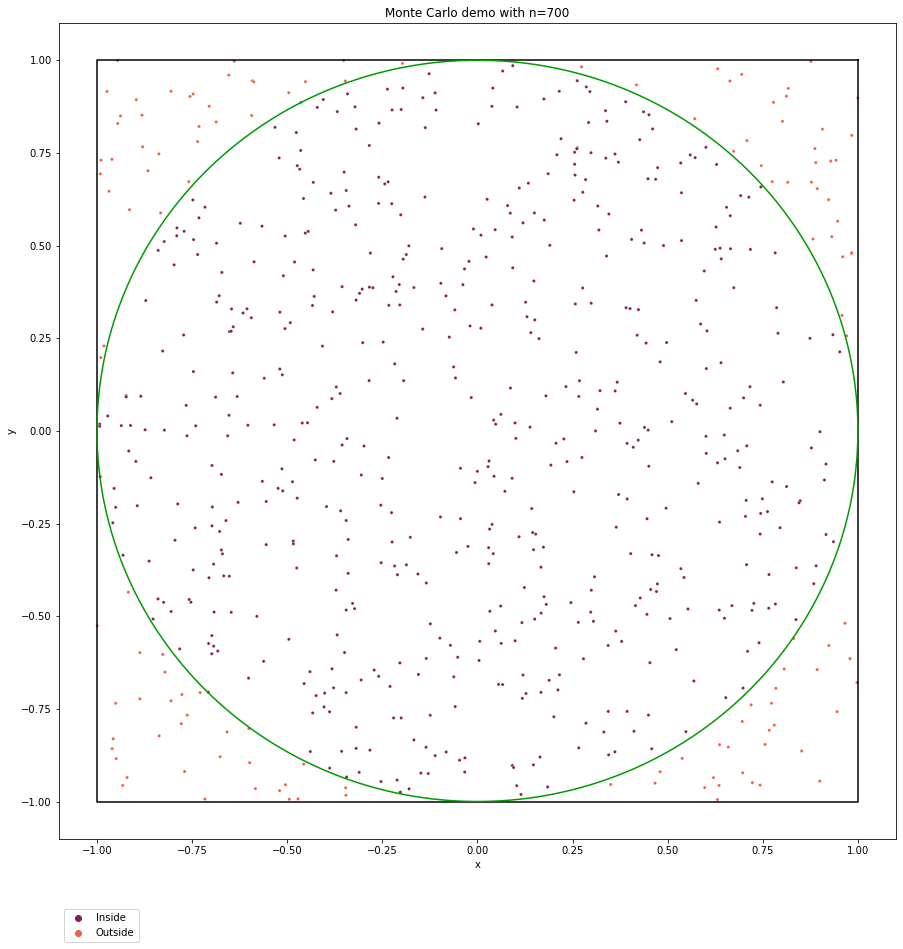


Pi is approximately 3.25501433

This is 3.61032409% off the true value.



In [10]:
Pi(700)
